In [3]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras import models,layers,losses,utils,callbacks
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report
import seaborn as sn

In [5]:
# Load CIFAR-10 dataset
(X_train,Y_train),(X_test,Y_test)=tf.keras.datasets.cifar10.load_data()

In [6]:
# Check dimensions of the training and test datasets
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)
(50000, 1)
(10000, 1)


In [7]:
# Reshape the target variables to a flat array
Y_train=Y_train.reshape(-1,)
Y_test=Y_test.reshape(-1,)

In [8]:
# Define class names for CIFAR-10 dataset
classes=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [9]:
# Function to plot a sample image from the dataset
def plot_sample(X,Y,index):
  plt.figure(figsize=(5,1))
  plt.imshow(X[index])
  print(classes[Y[index]])


ship


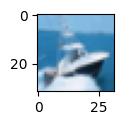

In [10]:
# Plot a sample image from the training set
plot_sample(X_train,Y_train,8)

In [11]:
# Scale pixel values to the range [0, 1]
scaled_X_train=X_train/255
scaled_X_test=X_test/255

In [12]:
# One-hot encode the target variables
Y_train_categorical=utils.to_categorical(
    Y_train,num_classes=10
)
Y_test_categorical=utils.to_categorical(
    Y_test,num_classes=10
)
# Display the first five one-hot encoded labels
Y_train_categorical[:5]

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [13]:
# Data augmentation to enhance model robustness
data_aug=tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
])

In [16]:
# Function to create and compile the model
def my_model():
  model=models.Sequential([
      data_aug,
      layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(32,32,3)),
      layers.MaxPool2D((2,2)),
      layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu'),
      layers.MaxPool2D((2,2)),
      layers.Flatten(),
      layers.Dense(256,activation='relu'),
      layers.Dropout(0.25),
      layers.Dense(128,activation='relu'),
      layers.Dropout(0.25),
      layers.Dense(64,activation='relu'),
      layers.Dropout(0.25),
      layers.Dense(32,activation='relu'),
      layers.Dense(10,activation='sigmoid')
  ])
  model.compile(
      optimizer='adam',
      loss=losses.categorical_crossentropy,
      metrics=['accuracy']
  )
  return model


# Function to evaluate the model
def eval(model, X, Y):
    model.evaluate(X, Y)

# Function for making predictions
def prediction(model, X, Y):
    Y_predict = model.predict(X)
    Y_pred = [np.argmax(i) for i in Y_predict]
    print('Predicted the first five labels:', Y_pred[:5])
    print('True labels of the first five elements:', Y[:5])
    return Y_pred

# Function to display classification report and confusion matrix
def report(truth, predictions):
    print(classification_report(truth, predictions))
    cm = tf.math.confusion_matrix(labels=truth, predictions=predictions)
    plt.figure(figsize=(10, 7))
    sn.heatmap(cm, annot=True, fmt='d')
    plt.xlabel('Predicted')
    plt.ylabel('Truth')

# Function to plot training and validation loss
def plot_loss(history):
    plt.figure(figsize=(10, 6))
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid()
    plt.show()

# Function to plot training and validation accuracy
def plot_accuracy(history):
    plt.figure(figsize=(10, 6))
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid()
    plt.show()


In [17]:
# Create and train the model
model=my_model() # Instantiate the model
tb_callback=callbacks.TensorBoard(log_dir='/logs',histogram_freq=1) # Set up TensorBoard callback
history=model.fit(scaled_X_train,Y_train_categorical,epochs=40,validation_split=0.2,callbacks=tb_callback) # Train the model

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/40
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.2314 - loss: 1.9926 - val_accuracy: 0.4191 - val_loss: 1.5706
Epoch 2/40
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.4345 - loss: 1.5322 - val_accuracy: 0.5009 - val_loss: 1.3650
Epoch 3/40
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.5026 - loss: 1.3836 - val_accuracy: 0.4966 - val_loss: 1.4082
Epoch 4/40
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.5541 - loss: 1.2536 - val_accuracy: 0.5706 - val_loss: 1.2217
Epoch 5/40
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.5802 - loss: 1.1936 - val_accuracy: 0.5973 - val_loss: 1.1438
Epoch 6/40
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.6061 - loss: 1.1268 - val_accuracy: 0.6222 - val_loss: 1.0853
Epoch 7/40
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.6231 - loss: 1.0833 - val_accuracy: 0.6317 - val_loss: 1.0485
Epoch 8/40
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.6360 - loss: 1.0444

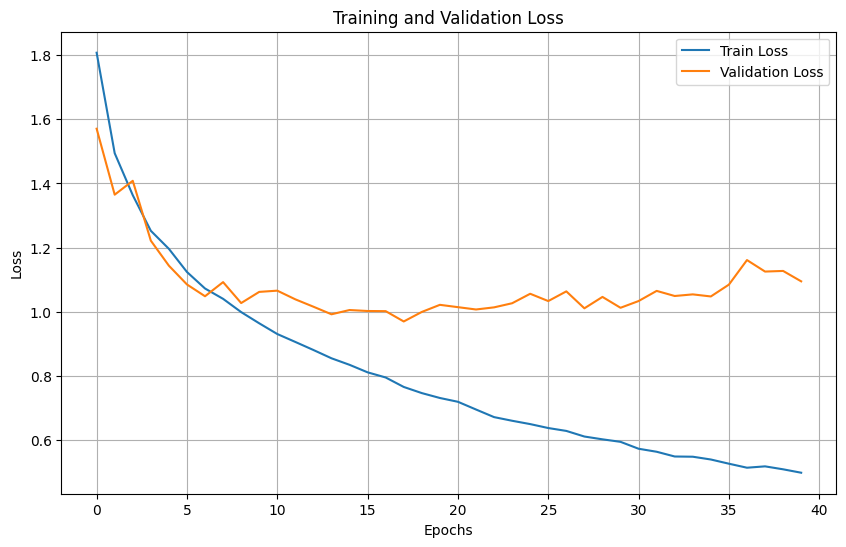

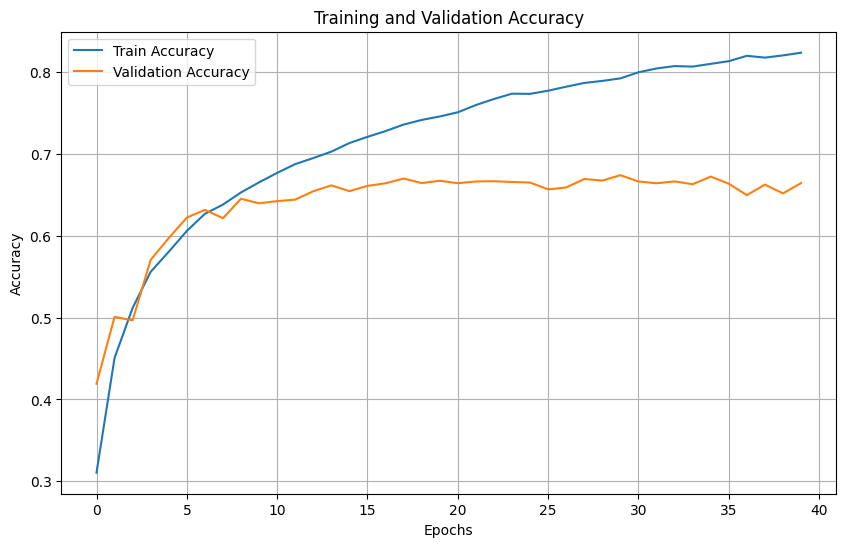

In [18]:
# Plot training and validation loss and accuracy
plot_loss(history)
plot_accuracy(history)

In [19]:
# Evaluate the model on the test set
eval(model,scaled_X_test,Y_test_categorical)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6485 - loss: 1.1297


In [21]:
# Make predictions
preds=prediction(model,scaled_X_test,Y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Predicted the first five labels: [np.int64(5), np.int64(8), np.int64(1), np.int64(0), np.int64(6)]
True labels of the first five elements: [3 8 8 0 6]


              precision    recall  f1-score   support

           0       0.67      0.77      0.72      1000
           1       0.81      0.80      0.81      1000
           2       0.57      0.52      0.54      1000
           3       0.42      0.47      0.44      1000
           4       0.55      0.59      0.57      1000
           5       0.58      0.53      0.55      1000
           6       0.76      0.72      0.74      1000
           7       0.72      0.64      0.68      1000
           8       0.75      0.77      0.76      1000
           9       0.74      0.72      0.73      1000

    accuracy                           0.65     10000
   macro avg       0.66      0.65      0.65     10000
weighted avg       0.66      0.65      0.65     10000



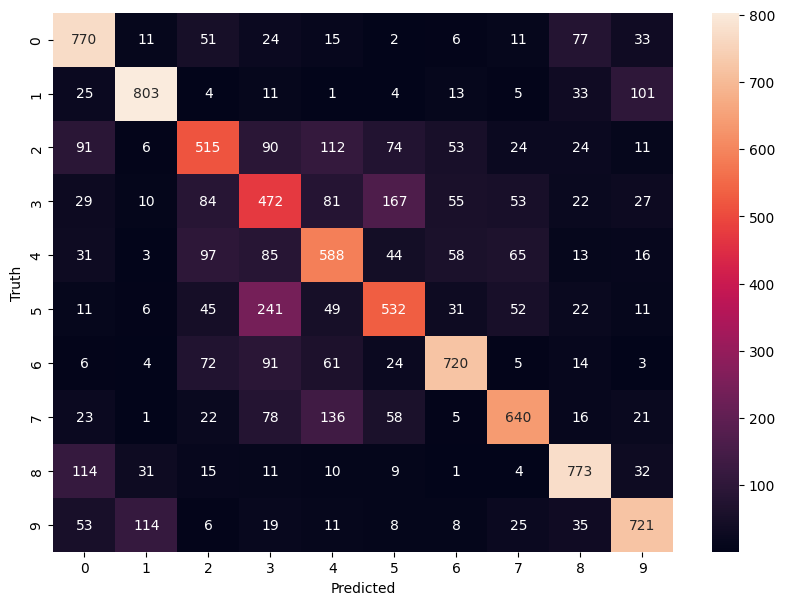

In [23]:
#Generate a report
report(Y_test,preds)